In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# loading the data
df = pd.read_csv("previous_application.csv")

In [4]:
df.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670204,1407146,198989,Cash loans,36598.095,450000.0,570073.5,NaN,450000.0,THURSDAY,12,...,XNA,24.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
1670205,2815130,338803,Cash loans,14584.050,135000.0,182956.5,NaN,135000.0,SATURDAY,10,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
1670206,2459206,238591,Cash loans,19401.435,180000.0,243936.0,0.0,180000.0,TUESDAY,13,...,XNA,24.0,high,Cash Street: high,365243.0,-1802.0,-1112.0,-1112.0,-1100.0,0.0
1670207,1662353,443544,Cash loans,12607.875,112500.0,112500.0,0.0,112500.0,MONDAY,10,...,XNA,12.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
1670208,1556789,209732,Cash loans,22299.390,315000.0,436216.5,NaN,315000.0,THURSDAY,17,...,XNA,36.0,middle,Cash X-Sell: middle,365243.0,-1249.0,-199.0,-919.0,-912.0,1.0
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [6]:
# Check data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [7]:

# Display basic statistics
print(df.describe(include='all'))


          SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
count   1.670214e+06  1.670214e+06            1670214  1.297979e+06   
unique           NaN           NaN                  4           NaN   
top              NaN           NaN         Cash loans           NaN   
freq             NaN           NaN             747553           NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.595512e+04   
std     5.325980e+05  1.028148e+05                NaN  1.478214e+04   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  6.321780e+03   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04   
75%     2.384280e+06  3.675140e+05                NaN  2.065842e+04   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05   

        AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count      1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+0

In [8]:
df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [9]:
100*df.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = 100 * df.isnull().mean()

# Identify columns with more than 40% missing values
columns_to_drop = missing_percentage[missing_percentage > 40].index

# Drop these columns from the dataframe
df = df.drop(columns=columns_to_drop)

# Display the updated dataframe information
print("Dropped columns with more than 40% missing values")
print(df.info())

Dropped columns with more than 40% missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  objec

In [11]:
100*df.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [12]:
df["AMT_ANNUITY"].median(),df["AMT_ANNUITY"].mean()

(11250.0, 15955.120659452119)

In [13]:
df["AMT_GOODS_PRICE"].median(),df["AMT_GOODS_PRICE"].mean()

(112320.0, 227847.27928334562)

In [14]:
df["CNT_PAYMENT"].median(),df["CNT_PAYMENT"].mean()

(12.0, 16.0540815603274)

In [15]:
# Replace missing values in CNT_PAYMENT, AMT_GOODS_PRICE, AMT_ANNUITY with their respective medians
columns_to_impute_specific = ['CNT_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY']

for column in columns_to_impute_specific:
    if df[column].isnull().sum() > 0:  # Check if there are any missing values
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

# Display the updated dataframe to verify changes
print("Replaced missing values with median in CNT_PAYMENT, AMT_GOODS_PRICE, AMT_ANNUITY")
100*df.isnull().mean()


Replaced missing values with median in CNT_PAYMENT, AMT_GOODS_PRICE, AMT_ANNUITY


SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


In [23]:
# Replace missing values in PRODUCT_COMBINATION with its mode
product_combination_mode = df['PRODUCT_COMBINATION'].mode()[0]
df['PRODUCT_COMBINATION'].fillna(product_combination_mode, inplace=True)

# Display the updated dataframe to verify changes
print("Replaced missing values with mode in PRODUCT_COMBINATION")
100*df.isnull().mean()


Replaced missing values with mode in PRODUCT_COMBINATION


SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [16]:
df["PRODUCT_COMBINATION"]

0             POS mobile with interest
1                     Cash X-Sell: low
2                    Cash X-Sell: high
3                  Cash X-Sell: middle
4                    Cash Street: high
                      ...             
1670209     POS industry with interest
1670210     POS industry with interest
1670211    POS household with interest
1670212               Cash X-Sell: low
1670213            Cash X-Sell: middle
Name: PRODUCT_COMBINATION, Length: 1670214, dtype: object

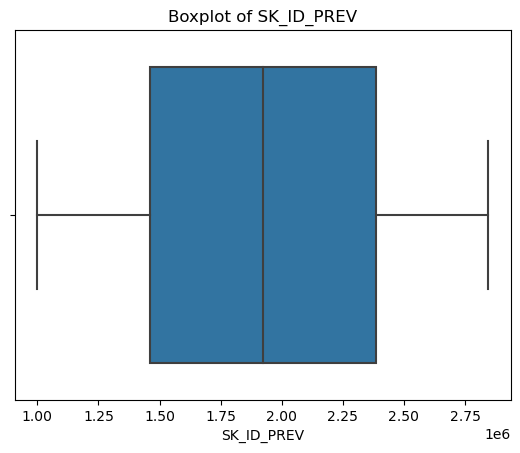

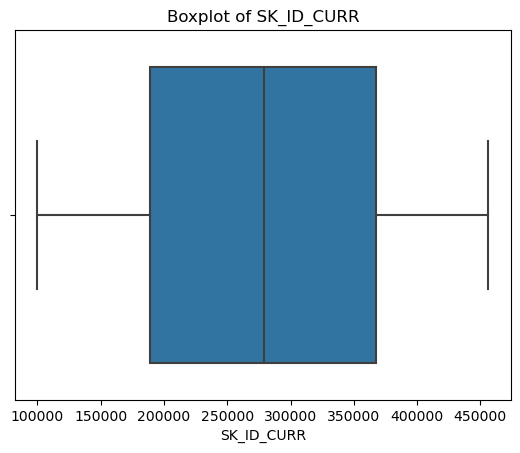

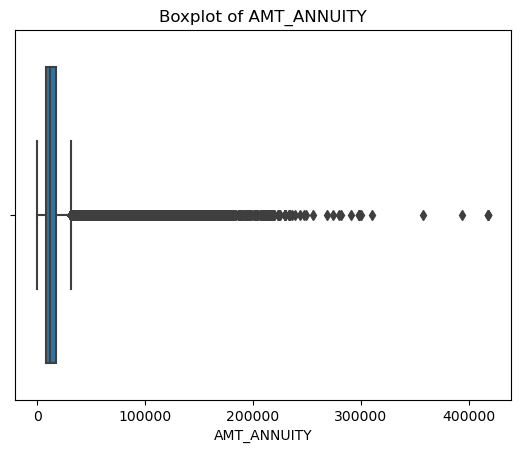

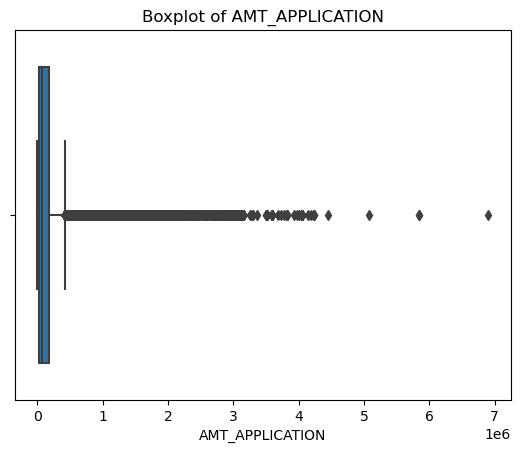

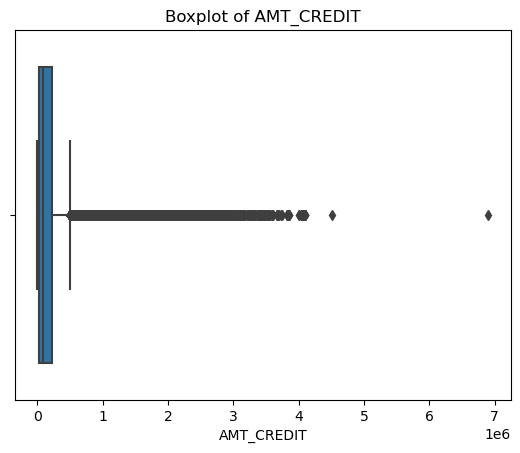

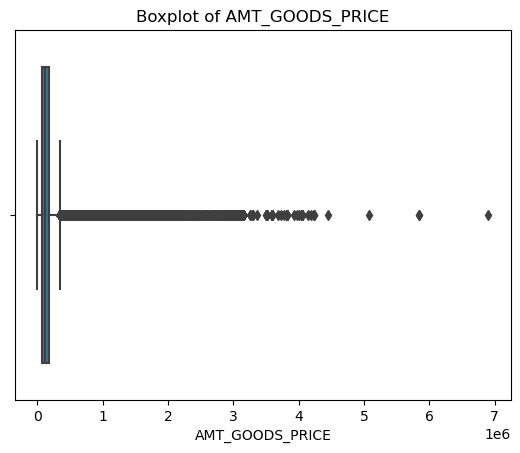

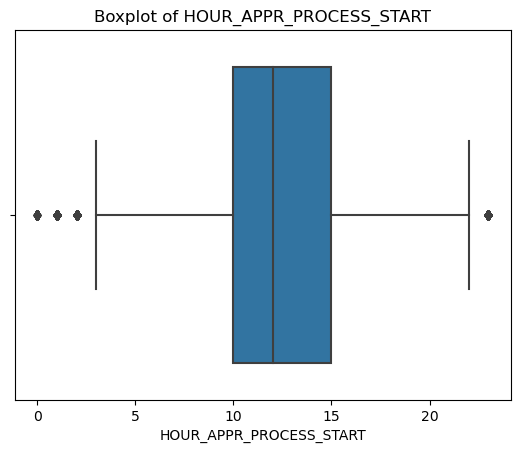

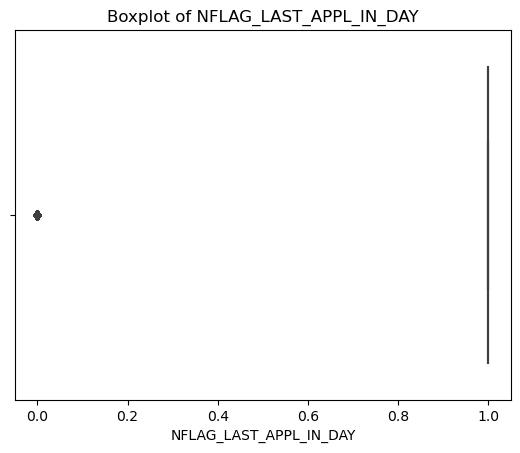

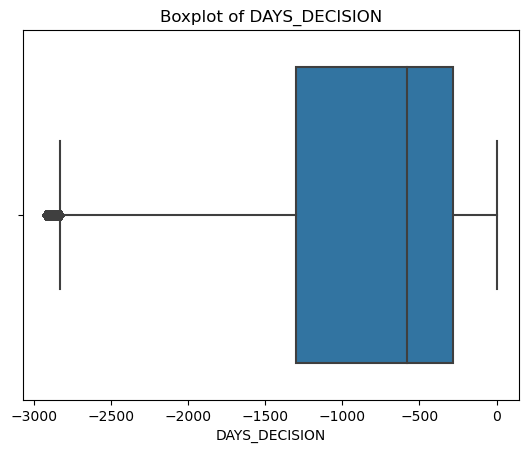

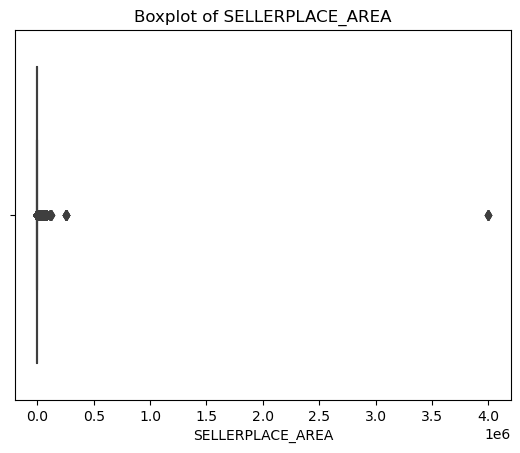

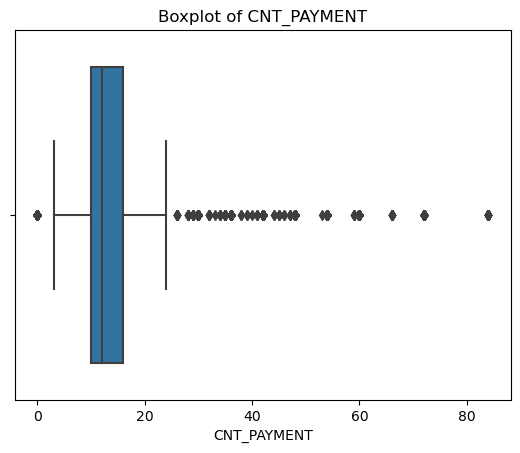

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [18]:
df["SELLERPLACE_AREA"]

0            35
1            -1
2            -1
3            -1
4            -1
           ... 
1670209      43
1670210      43
1670211    1370
1670212      -1
1670213      -1
Name: SELLERPLACE_AREA, Length: 1670214, dtype: int64

          SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
count   1.670214e+06  1.670214e+06            1670214  1.670214e+06   
unique           NaN           NaN                  4           NaN   
top              NaN           NaN         Cash loans           NaN   
freq             NaN           NaN             747553           NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.490651e+04   
std     5.325980e+05  1.028148e+05                NaN  1.317751e+04   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  7.547096e+03   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04   
75%     2.384280e+06  3.675140e+05                NaN  1.682403e+04   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05   

        AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count      1.670214e+06  1.670213e+06     1.670214e+06   
unique              NaN        

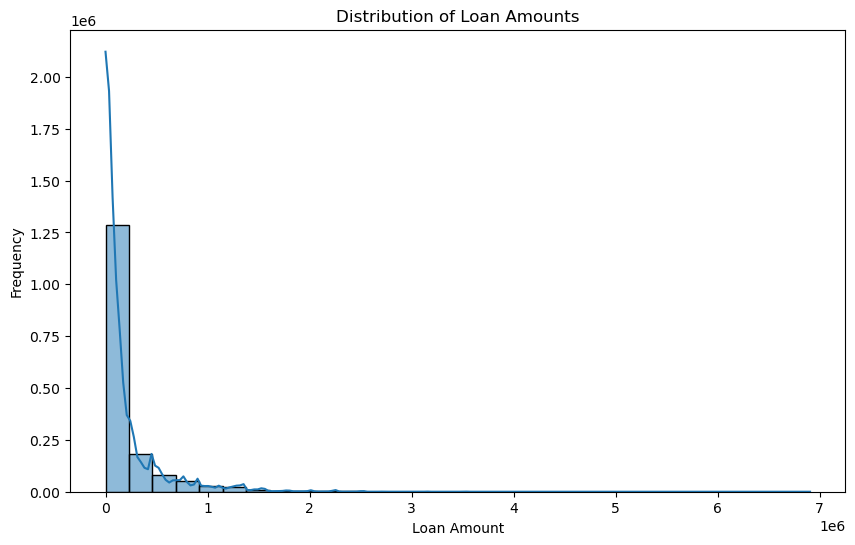

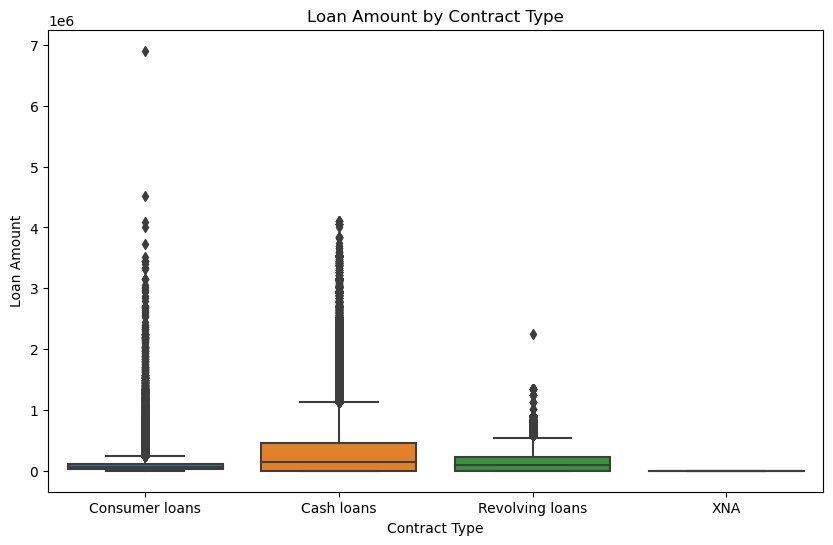

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe(include='all'))

# Distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['AMT_CREDIT'], bins=30, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Loan amount by contract type
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=df)
plt.title('Loan Amount by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Loan Amount')
plt.show()


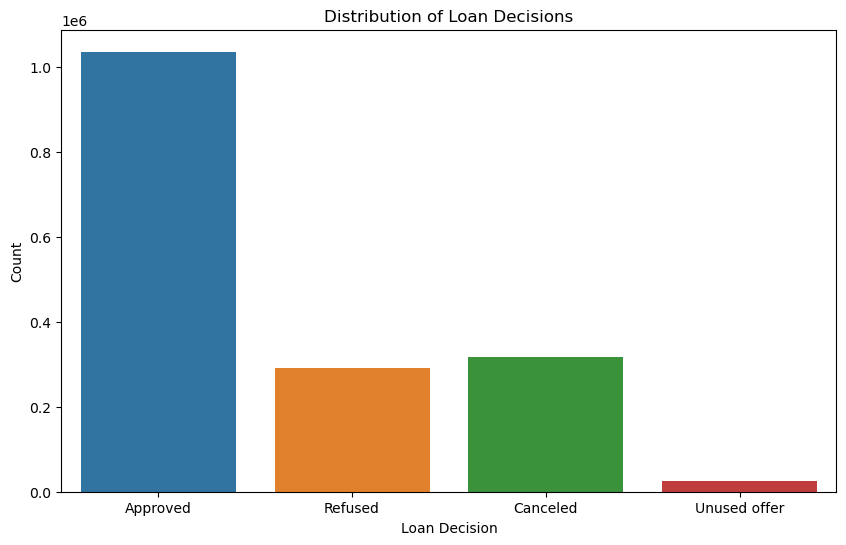

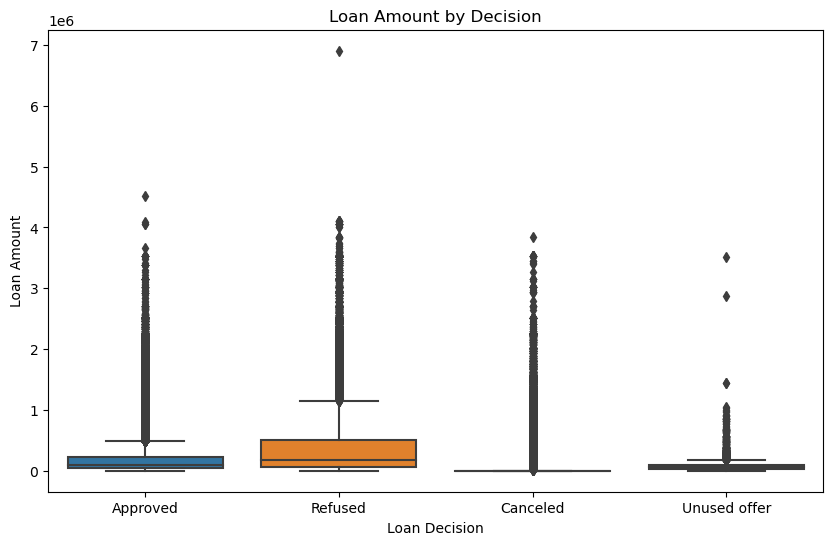

In [20]:
# Count of loan decisions
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', data=df)
plt.title('Distribution of Loan Decisions')
plt.xlabel('Loan Decision')
plt.ylabel('Count')
plt.show()

# Loan amount by decision
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', data=df)
plt.title('Loan Amount by Decision')
plt.xlabel('Loan Decision')
plt.ylabel('Loan Amount')
plt.show()


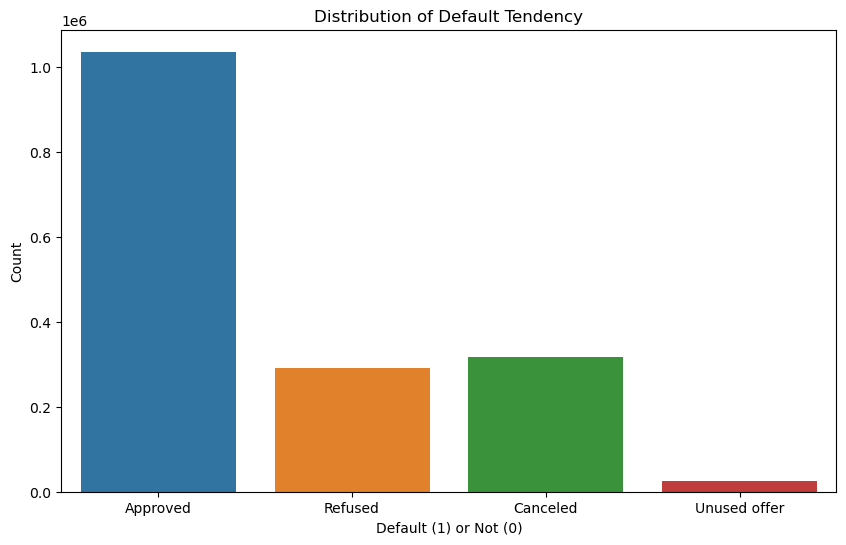

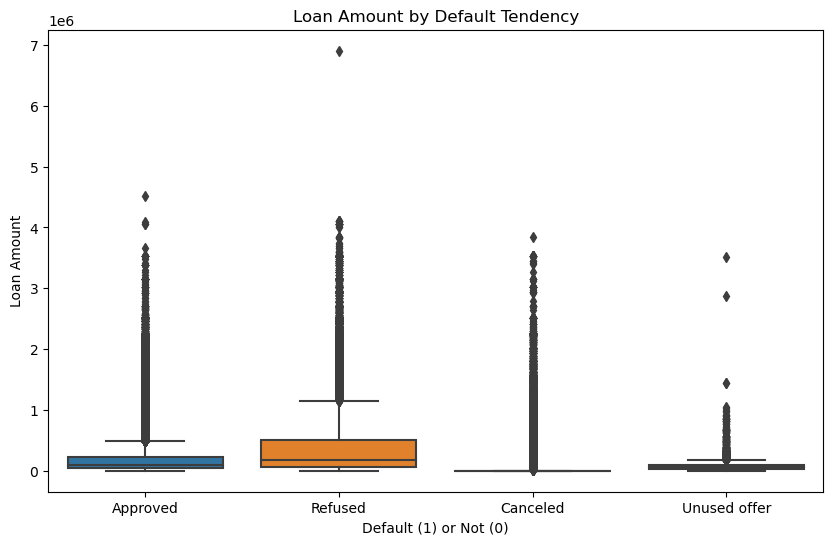

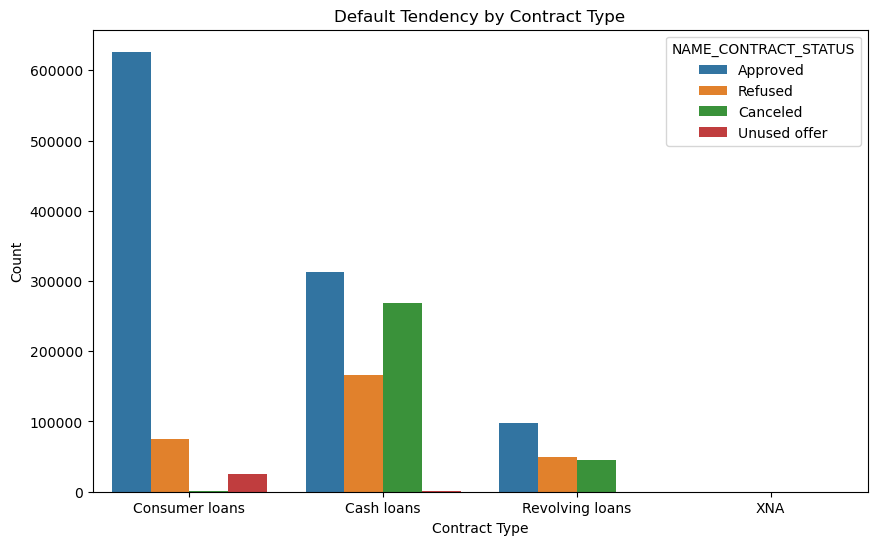

In [21]:
# Assuming 'TARGET' column indicates default (1) or not (0)
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', data=df)
plt.title('Distribution of Default Tendency')
plt.xlabel('Default (1) or Not (0)')
plt.ylabel('Count')
plt.show()

# Loan amount by default tendency
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', data=df)
plt.title('Loan Amount by Default Tendency')
plt.xlabel('Default (1) or Not (0)')
plt.ylabel('Loan Amount')
plt.show()

# Default tendency by contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='NAME_CONTRACT_STATUS', data=df)
plt.title('Default Tendency by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


In [31]:
df.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,11250.000,0.0,0.0,112320.0,TUESDAY,11,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
7,1656711,296299,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,7,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
8,2367563,342292,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,15,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
9,2579447,334349,Cash loans,11250.000,0.0,0.0,112320.0,SATURDAY,15,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash


In [32]:
df.shape

(1670214, 26)

In [22]:
# Assuming you have already loaded previous_application.csv into a DataFrame called df_prev_app
df = df.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis=1)

# Display the first few rows to confirm the columns are dropped
df.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [24]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows to confirm the columns are dropped
df.head(20)

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,Cash loans,11250.000,0.0,0.0,112320.0,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
7,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
8,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
9,Cash loans,11250.000,0.0,0.0,112320.0,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash


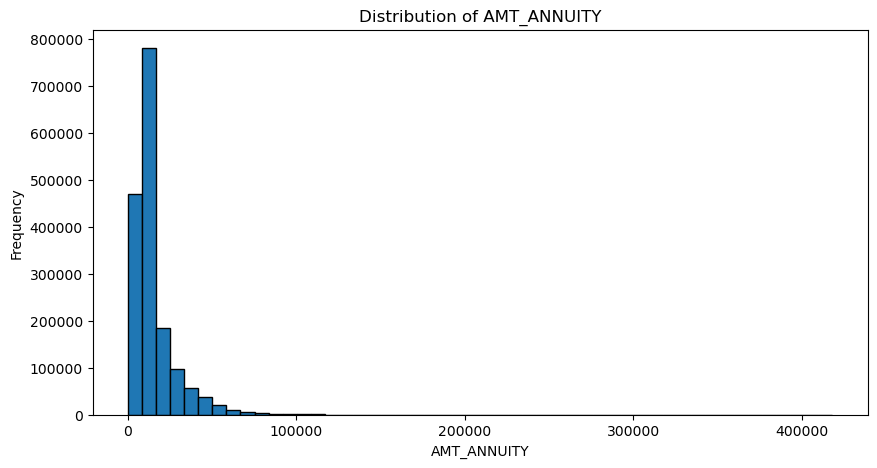

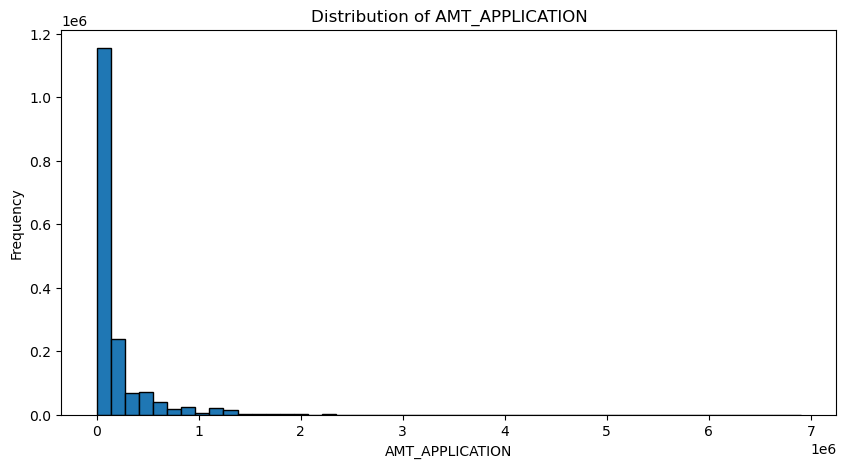

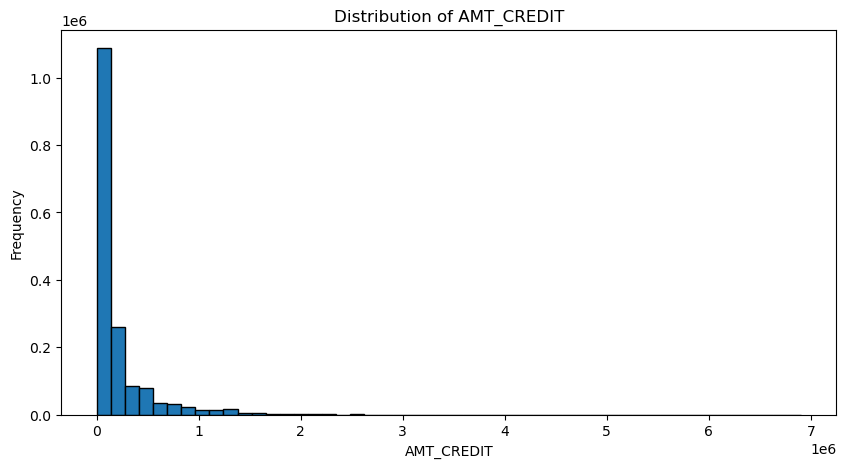

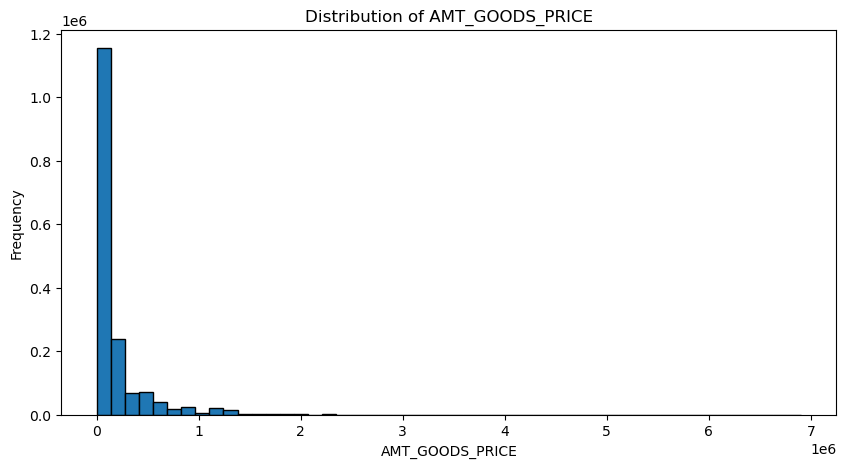

In [31]:
columns = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

# Plot histograms
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df[column].dropna(), bins=50, edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

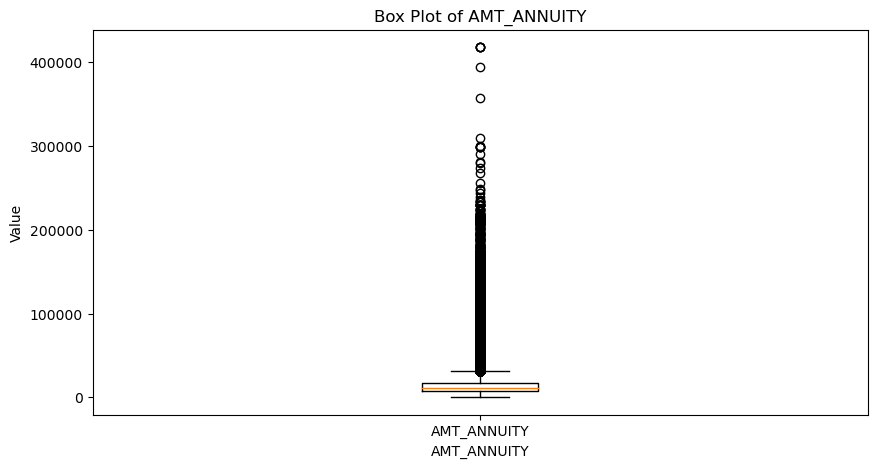

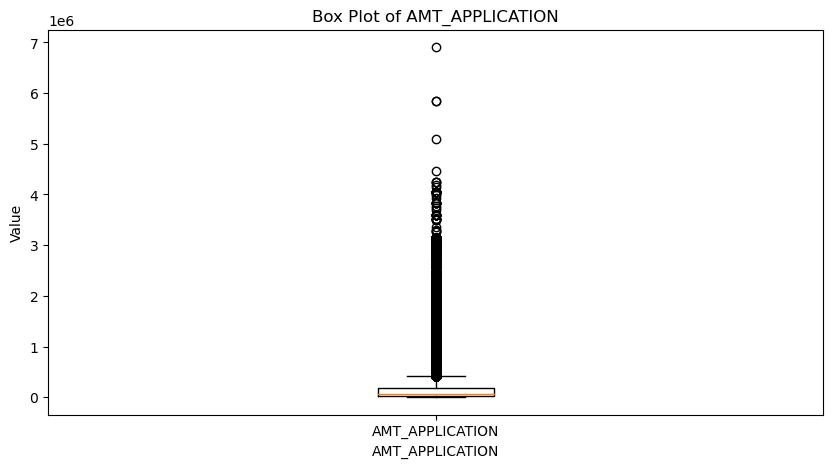

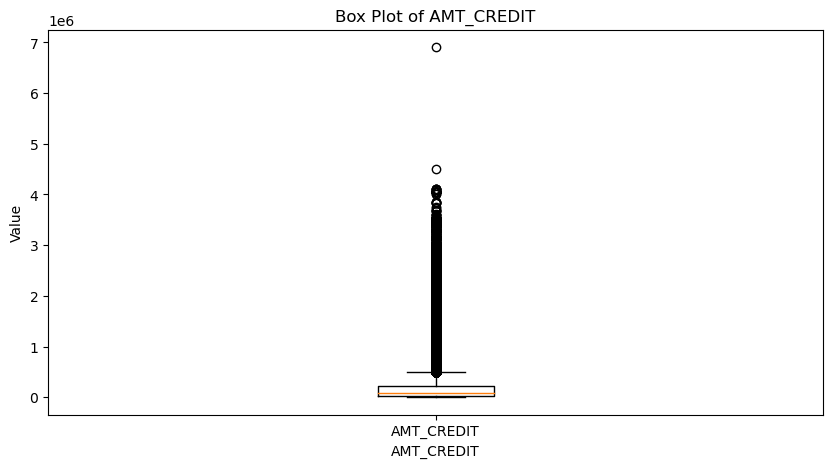

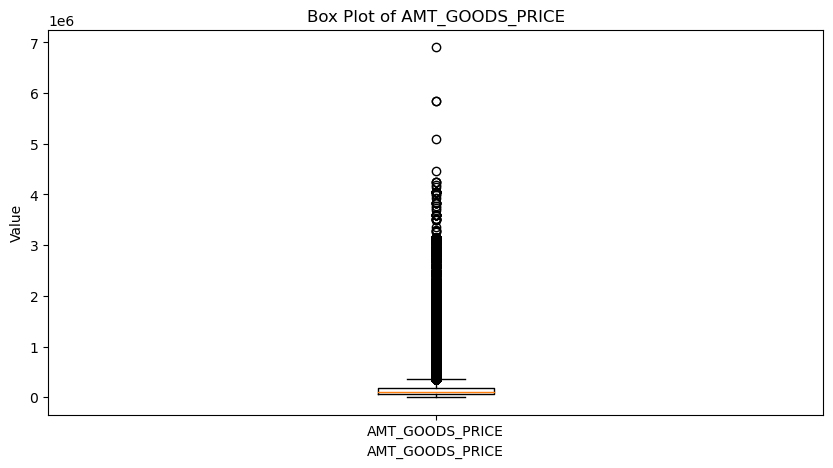

In [32]:
# Plot box plots
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[column].dropna())
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.xticks([1], [column])
    plt.show()


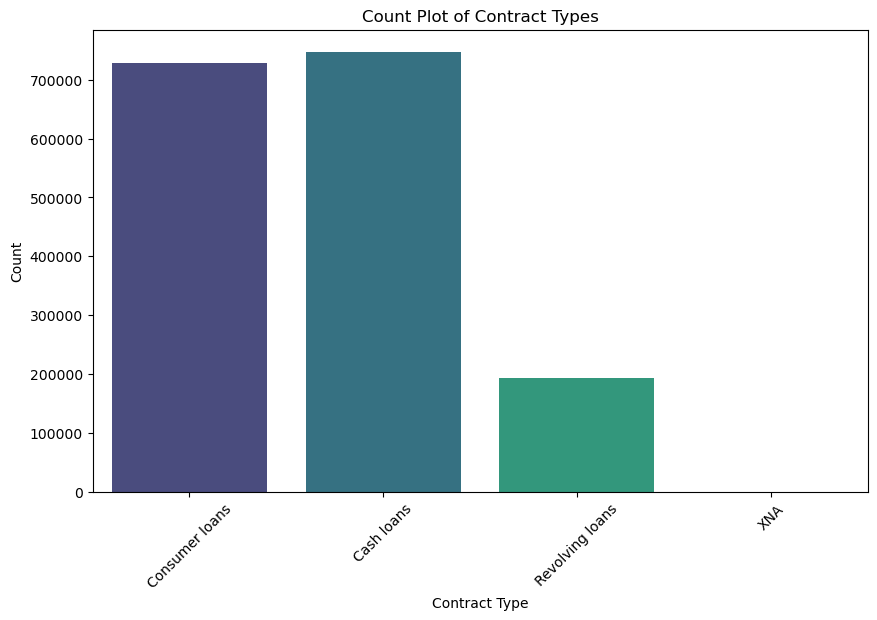

In [33]:
# Count plot for NAME_CONTRACT_TYPE
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_TYPE', data=df, palette='viridis')
plt.title('Count Plot of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

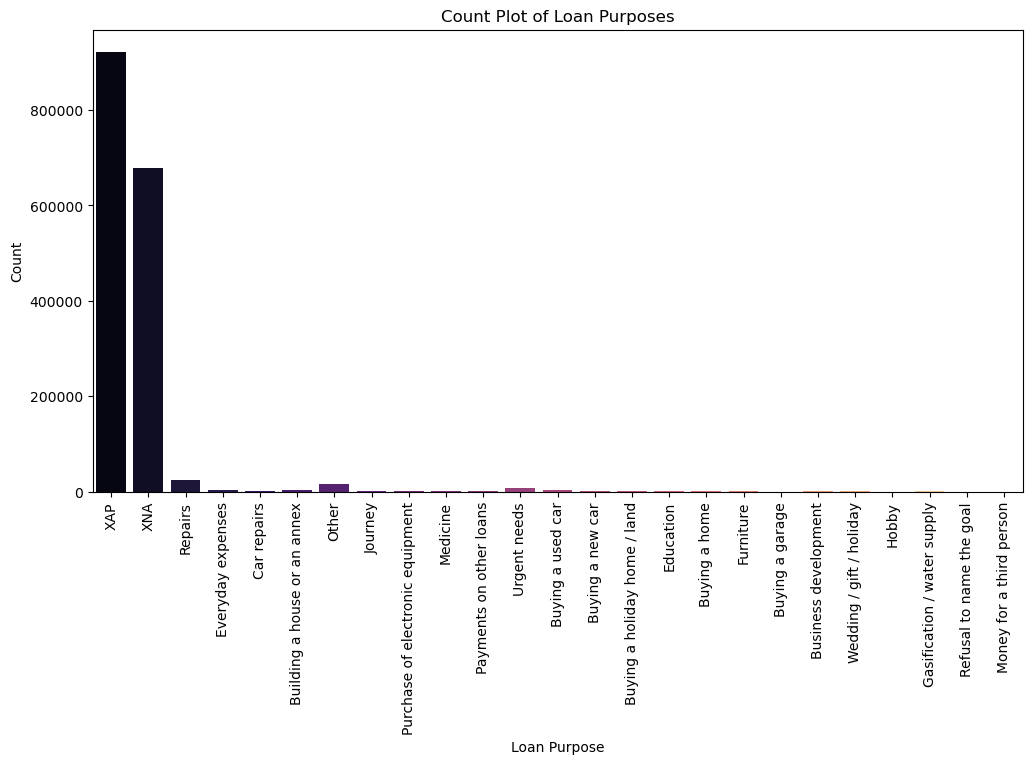

In [34]:

# Count plot for NAME_CASH_LOAN_PURPOSE
plt.figure(figsize=(12, 6))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=df, palette='magma')
plt.title('Count Plot of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()

In [37]:
df["NAME_CASH_LOAN_PURPOSE"].value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

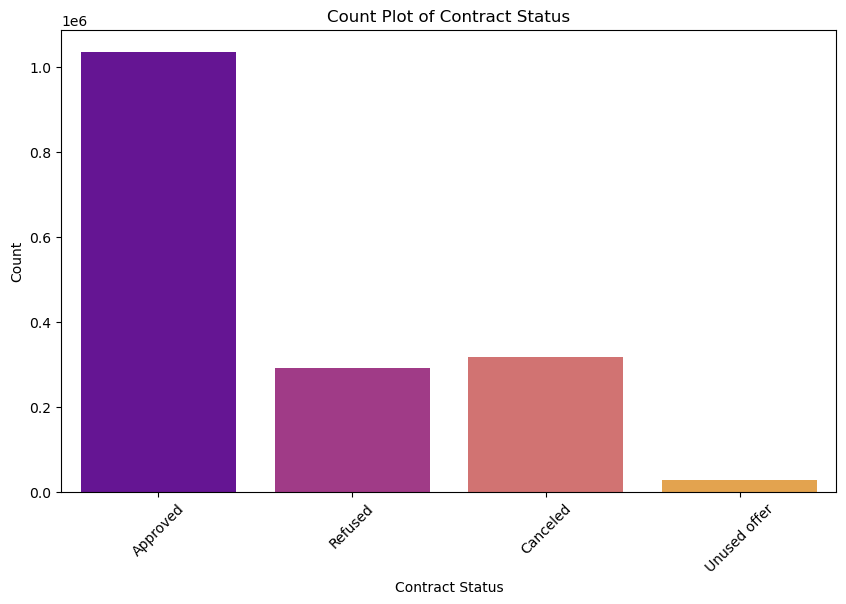

In [38]:
# Count plot for NAME_CONTRACT_STATUS
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', data=df, palette='plasma')
plt.title('Count Plot of Contract Status')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

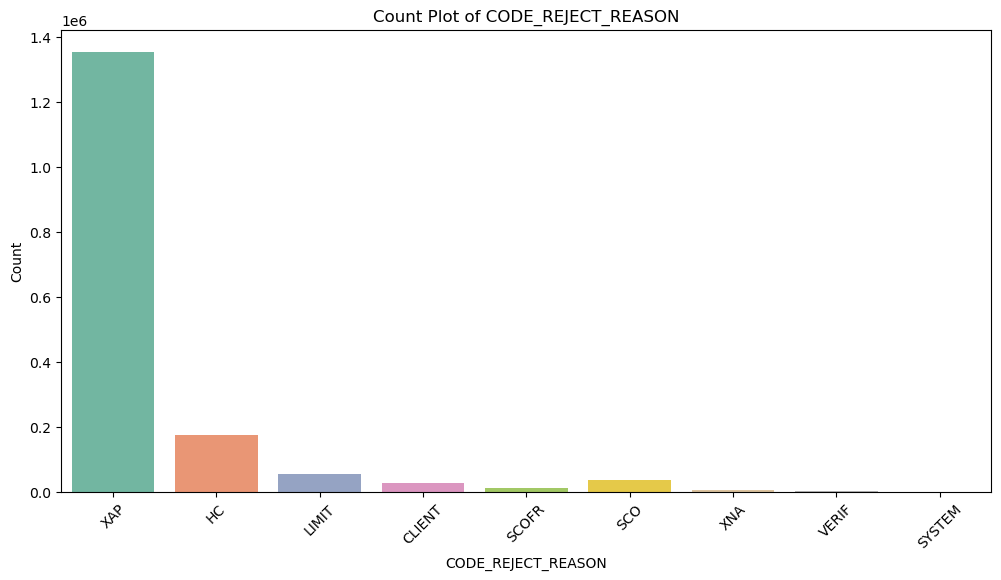

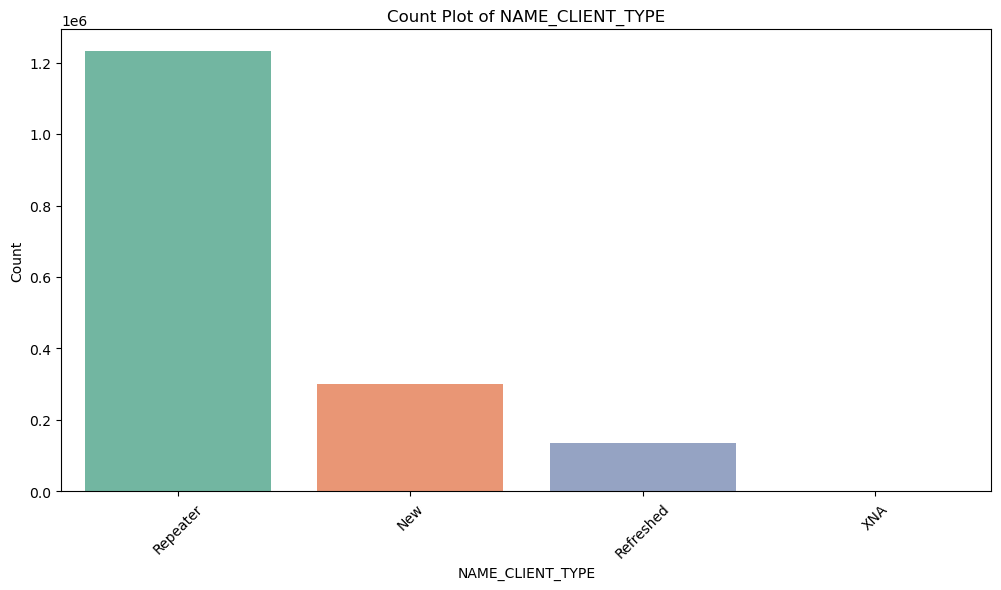

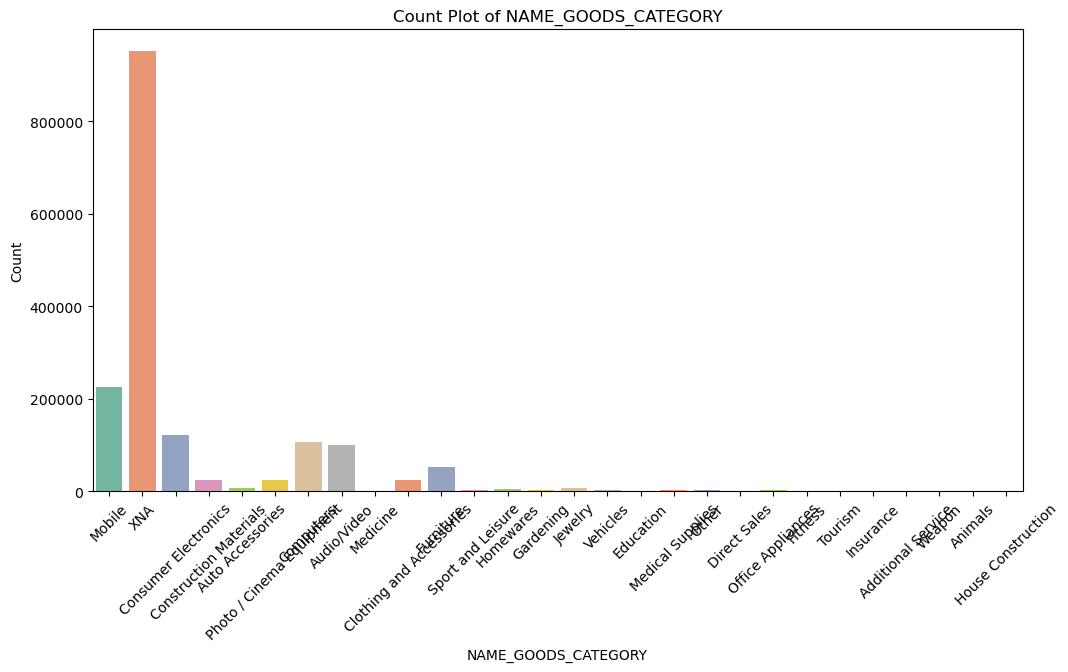

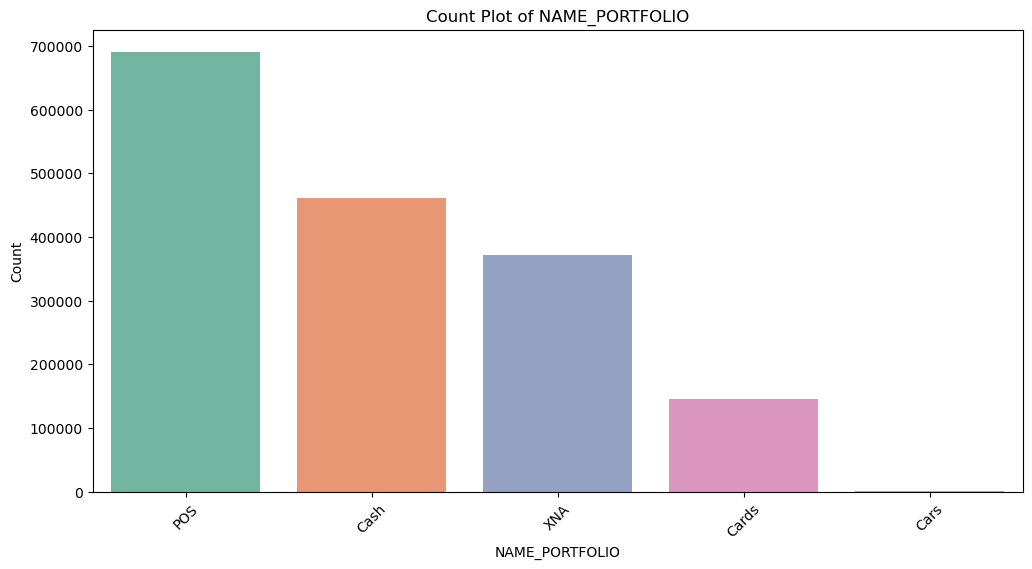

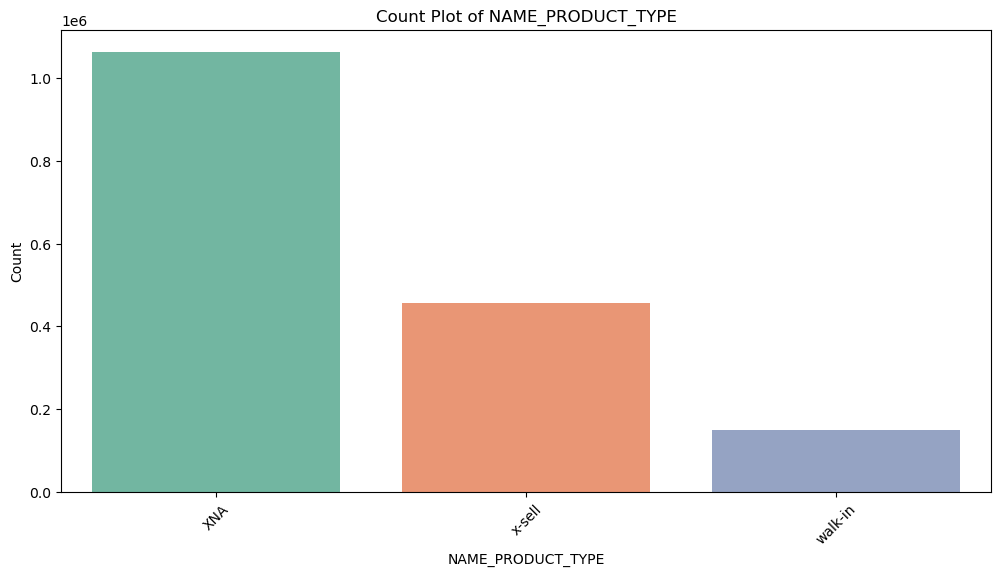

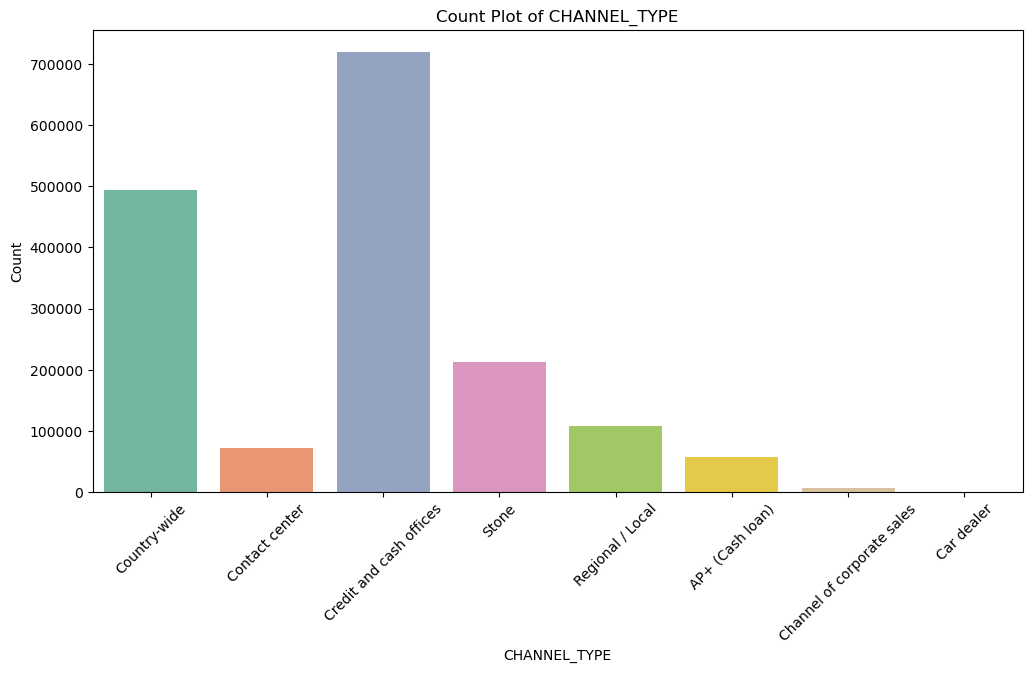

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of variables
variables = ['CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 
             'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE']

# Plot count plots for each variable
for variable in variables:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=variable, data=df, palette='Set2')
    plt.title(f'Count Plot of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability
    plt.show()


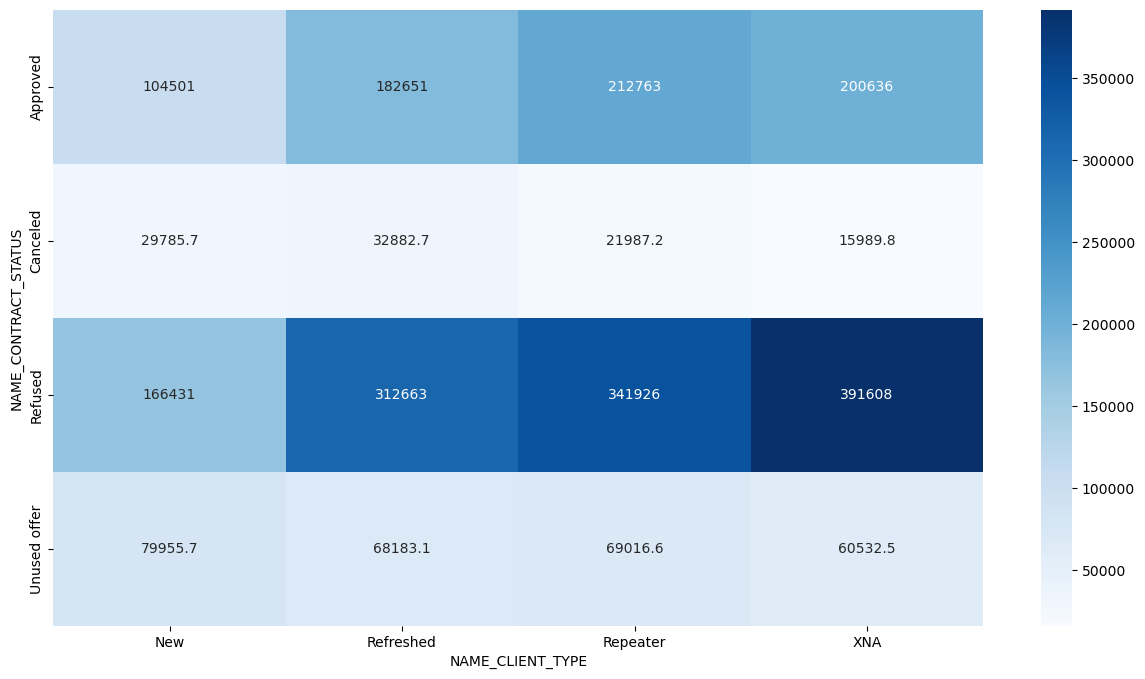

In [41]:
#Checking contract status vs name client type aggregating over application amount

res=pd.pivot_table(data=df, index="NAME_CONTRACT_STATUS", columns= "NAME_CLIENT_TYPE", values="AMT_APPLICATION")

plt.figure(figsize=(15,8)) 
sns.heatmap(res, annot=True, cmap='Blues', fmt="g")

plt.show()